# Properties of apps with ≥ 1M installs

In [2]:
dataset_meta = DatasetMeta(SchemaName.PLAY_STORE, PlayStoreDatasetName.DATASET1)
dataset = Dataset(dataset_meta)
dataset_df = dataset.load_data()

dataset_df.head()

,app_id,name,category,rating,reviews,app_size_kb,installs,type,price,content_rating,last_updated,min_android_ver
1,1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,2018,4
2,2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,1000000,Free,0.0,Everyone,2018,4
3,3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,10000000,Free,0.0,Everyone,2018,4
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,1000000,Free,0.0,Everyone,2018,4
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,10000,Free,0.0,Everyone,2017,2


In [3]:
actions_lst = [
    GroupAction(grouped_column=Column('content_rating'), aggregated_column=Column('installs'), 
                aggregation_function=AggregationFunction.AVERAGE),
    GroupAction(grouped_column=Column('type'), aggregated_column=Column('app_size_kb'), 
                aggregation_function=AggregationFunction.AVERAGE),
    BackAction(),
    BackAction(),
    FilterAction(filtered_column=Column('min_android_ver'), filter_operator=FilterOperator.EQUAL, filter_term=5),
    GroupAction(grouped_column=Column('type'), aggregated_column=Column('app_id'), 
                aggregation_function=AggregationFunction.COUNT),
    GroupAction(grouped_column=Column('installs'), aggregated_column=Column('rating'), 
                aggregation_function=AggregationFunction.AVERAGE),
    BackAction(),
    BackAction(),
    GroupAction(grouped_column=Column('last_updated'), aggregated_column=Column('app_id'), 
                aggregation_function=AggregationFunction.COUNT),
    GroupAction(grouped_column=Column('content_rating'), aggregated_column=Column('rating'), 
                aggregation_function=AggregationFunction.AVERAGE),
    ]
    
actions_simulator = ActionsSimulator(dataset=dataset)
action_execution_result_lst = actions_simulator.run_actions(actions_lst)

### Session Tree:

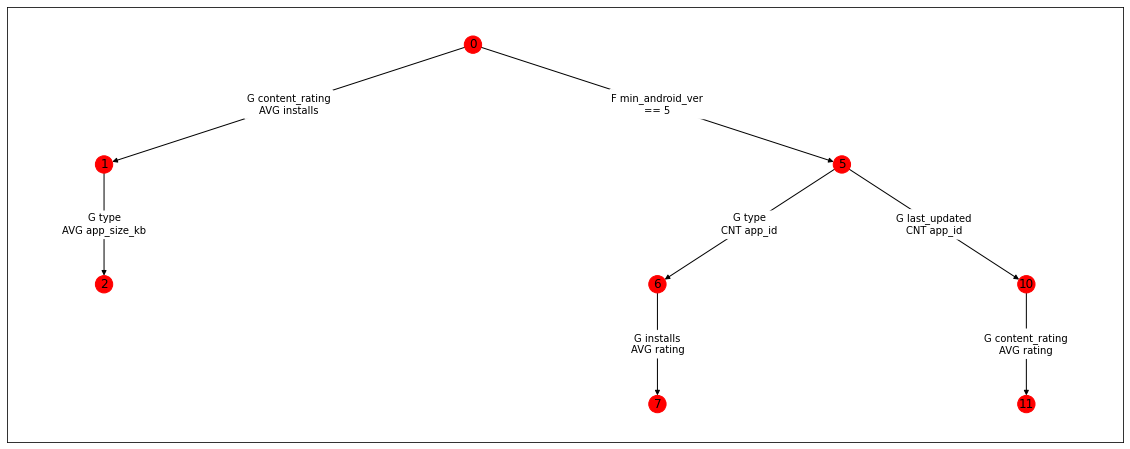

In [4]:
draw_nx_display_tree(action_execution_result_lst)

### Query 1: <span style="color:blue;">Group by content_rating AVG(installs)</span>

In [5]:
display(prepare_display(action_execution_result_lst, 0))

,installs
content_rating,
Everyone 10+,"115,491,855.77"
Teen,"39,997,106.01"
Everyone,"28,787,573.75"
Mature 17+,"13,434,036.01"
Adults only 18+,"1,000,000.00"
Unrated,"10,000.00"


### Query 2: <span style="color:DimGray">Group by content_rating AVG(installs) AND</span> <span style="color:blue;">Group by type AVG(app_size_kb)</span>

In [6]:
display(prepare_display(action_execution_result_lst, 1))

installs  app_size_kb
content_rating  type                            
Adults only 18+ Free   1,000,000.00    22,950.00
Everyone        Free  31,254,861.69    20,559.36
                Paid     148,681.82    18,361.71
Everyone 10+    Free 126,842,690.14    41,801.15
                Paid     361,964.29    28,889.29
Mature 17+      Free  13,938,420.75    25,841.52
                Paid     932,500.00    35,857.14
Teen            Free  42,161,975.16    33,022.23
                Paid     389,840.91    37,743.18
Unrated         Free      10,000.00     6,400.00

### Query 5: <span style="color:blue;">Filter min_android_ver == 5</span>

In [7]:
display(prepare_display(action_execution_result_lst, 4))

,app_id,name,category,rating,reviews,app_size_kb,installs,type,price,content_rating,last_updated,min_android_ver
73,73,Supervision service,AUTO_AND_VEHICLES,4.00,2155,15000,1000000,Free,0.00,Everyone,2018,5
85,85,Hush - Beauty for Everyone,BEAUTY,4.70,18900,17000,1000000,Free,0.00,Everyone,2018,5
103,103,"Sephora: Skin Care, Beauty Makeup & Fragrance ...",BEAUTY,4.50,26834,57000,1000000,Free,0.00,Everyone,2018,5
147,147,ADP Mobile Solutions,BUSINESS,4.30,85185,29000,10000000,Free,0.00,Everyone,2018,5
150,150,Job Search by ZipRecruiter,BUSINESS,4.80,148945,25000,1000000,Free,0.00,Everyone,2018,5
...,...,...,...,...,...,...,...,...,...,...,...,...
7547,7547,Firefox Focus: The privacy browser,COMMUNICATION,4.40,36981,4000,1000000,Free,0.00,Everyone,2018,5
7581,7581,AAFP,MEDICAL,3.80,63,24000,10000,Free,0.00,Everyone,2018,5
7590,7590,Trine 2: Complete Story,GAME,3.80,252,11000,10000,Paid,16.99,Teen,2015,5
7603,7603,Fuel Rewards® program,LIFESTYLE,4.60,32433,46000,1000000,Free,0.00,Everyone,2018,5


### Query 6: <span style="color:DimGray">Filter min_android_ver == 5 AND</span> <span style="color:blue;">Group by type CNT(app_id)</span>

In [8]:
display(prepare_display(action_execution_result_lst, 5))

,app_id
type,
Free,477
Paid,30


### Query 7: <span style="color:DimGray">Filter min_android_ver == 5 AND Group by type CNT(app_id) AND</span> <span style="color:blue;">Group by installs AVG(rating)</span>

In [9]:
display(prepare_display(action_execution_result_lst, 6))

app_id  rating
type installs                  
Paid 1000            12    4.50
     10000           12    4.28
     1000000          6    4.55
Free 1000            66    4.00
     10000          103    4.10
     1000000        202    4.15
     10000000       103    4.27
     1000000000       3    4.43

### Query 10: <span style="color:DimGray">Filter min_android_ver == 5 AND</span> <span style="color:blue;">Group by last_updated CNT(app_id)</span>

In [10]:
display(prepare_display(action_execution_result_lst, 9))

,app_id
last_updated,
2014,1
2015,16
2016,10
2017,30
2018,450


### Query 11: <span style="color:DimGray">Filter min_android_ver == 5 AND Group by last_updated CNT(app_id) AND</span> <span style="color:blue;">Group by content_rating AVG(rating)</span>

In [11]:
display(prepare_display(action_execution_result_lst, 10))

app_id  rating
last_updated content_rating                
2014         Everyone             1    2.00
2015         Everyone            14    3.66
             Teen                 1    3.80
             Mature 17+           1    1.90
2016         Everyone             9    3.92
             Mature 17+           1    1.90
2017         Everyone            27    4.07
             Teen                 3    4.23
2018         Everyone           382    4.23
             Teen                31    4.21
             Mature 17+          19    3.89
             Everyone 10+        18    3.98